# NLP 2026
# Lab 2: Word Vectors and Information Retrieval
## *alt*-title: 🚀 Project CleanSearch AI, a DOGE initiative

## 🏛️🐕 PRESS RELEASE — For Immediate (and Maximum Efficiency) Distribution  

### The Department of Outdated Government Encyclopedias (DOGE) Launches Revolutionary NLP Project to Rescue Public Knowledge  

**Washington, D.C.** — In a bold step toward modernizing the nation’s most chaotic digital archives, the   **Department of Outdated Government Encyclopedias (DOGE)** today announced the launch of its new initiative:  🚀 **Project CleanSearch AI**.

For decades, citizens have struggled to find simple answers hidden inside massive, noisy, and poorly structured government knowledge repositories.

Questions such as:

- “Who won the Nobel Prize in 1930?”  
- “When did Angola become independent?”  

have resulted in thousands of irrelevant web pages, confusing biographies and excessive scrolling 📉

> *“Frankly, our archives are a mess,”* said a DOGE spokesperson.  
> *“They’re long, noisy and about as searchable as a pile of printed Wikipedia pages thrown into a hurricane.”*

### 🧠 The Solution  

DOGE has assembled an elite team of AI specialists, hired from UM DACS 2nd year bachelor program with the following goals:

✅ Clean decades of messy digital text  
✅ Extract meaningful knowledge  
✅ Replace outdated keyword search with modern **retrieval systems**  
✅ Deliver instant, accurate answers to citizens  

Using real-world noisy data similar to the government’s archives, the team will experiment with multiple retrieval models to determine the most efficient approach, methods which have been taught in the fabulous classes of some person quoted as J.S. 

Whispers across the digital corridors suggest that DOGE may soon supercede the legendary Project 2-2, though DACS management insist these rumours are “under control.”


## Deliverable:

- You are asked to deliver **two files only**:
  - your executed notebook file (`.ipynb`), and
  - your poster (`.pdf`).  
  No other files will be taken into consideration.
  
⚠️ ⚠️ ⚠️ Each part of the poster will contribute to your grade proportionally to what we present below. If we can't find the relevant part in your notebook (e.g. the figure or the code to support your findings) we will reduce (or even zero-out) your grade for that part.

### Instructions for the poster: 

The final deliverable for this lab is a **scientific poster** presenting your work on building and evaluating a sentence retrieval system using the TriviaQA dataset.
- 📏 **Size:** A0 or A1  
- 🧭 **Orientation:** Portrait or landscape (your choice)  
- 📑 **Layout:** Clear section structure (e.g., columns or blocks)  

#### Your poster should include the following sections:
---
#### 1️⃣ Problem & Motivation 🎯
- Describe the retrieval task (query → correct answer document) and the challenges
- Briefly introduce the dataset and its challenges  
#### 2️⃣ Data Preparation 🧹
Explain:
- Train / validation / test splitting  
- Your cleaning pipeline (at least 6 preprocessing steps)  
Include at least one **before vs after cleaning** example.
#### 3️⃣ Retrieval Models 🤖
Present and explain the modes you used:
- Bag-of-Words + cosine similarity  
- TF-IDF + cosine similarity  
- Sentence embeddings (averaged word embeddings)  
- [any other model?] 
Discuss strengths and limitations of each.
#### 4️⃣ Qualitative Analysis 🔍
Provide:
- At least **3 successful retrieval examples**  
- At least **3 failure cases**  
Explain why each worked or failed.
#### 5️⃣ Quantitative Evaluation 📊 (Main focus)
Report **Recall@K** (and possibly other metrics) on the **test set** for all methods:
- BOW  
- TF-IDF  
- Pre-trained embeddings  
- [Additional models]  
Include relevant table(s) and/or plot(s) and briefly discuss trends.
#### 6️⃣ Discussion & Recommendations 💡
Conclude with:
- Which method you would recommend and why  
- Key tradeoffs  
- Possible improvements  
### 🎨 Optional Creative Element (Bonus)

You may (optionally) present your poster within the fictional storyline of 🏛️ **DOGE — Department of Outdated Government Encyclopedias**, where your retrieval system modernizes chaotic national archives and replaces legacy keyword search. Creativity is welcome, but scientific clarity is the priority. We will vote for the "most creative poster".

---

### 📏 Evaluation Focus

Posters will be assessed on:
- Correctness of the pipeline incl. the code (25%)
- Clarity of explanations and interpretations of results (25%)
- Quality of analysis (20%)
- Proper use of evaluation metrics (e.g. Recall@K) (10%)
- Visual organization (10%)
- Discussion and recommendations (10%)

## Preparing the dataset

As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). We will work with TriviaQA dataset ([https://huggingface.co/datasets/sentence-transformers/trivia-qa](https://huggingface.co/datasets/sentence-transformers/trivia-qa)), which contains pairs of queries and articles that contain the answer.

In this section we will prepare the dataset, aka clean the sentences and tokenize. We will additionally extract the answers, as some articles correspond to multiple queries. We will create a separate dataset from the unique answers. We will do that for each split separately, so that we can test our retrieval fairly.

Let's start with importing the necessary libraries.

In [52]:
import re
from collections import Counter

import datasets
import numpy as np
import tqdm
from datasets import DatasetDict
import matplotlib.pyplot as plt

### Loading
Now, we can begin loading the dataset and inspecting the fields.

In [53]:
dataset = datasets.load_dataset('sentence-transformers/trivia-qa')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['query', 'answer'],
        num_rows: 73346
    })
})


In [54]:
for i in range(5):
    print(dataset['train'][i])

{'query': 'Which American-born Sinclair won the Nobel Prize for Literature in 1930?', 'answer': 'The Nobel Prize in Literature 1930 The Nobel Prize in Literature 1930 Sinclair Lewis The Nobel Prize in Literature 1930 Sinclair Lewis Prize share: 1/1 The Nobel Prize in Literature 1930 was awarded to Sinclair Lewis "for his vigorous and graphic art of description and his ability to create, with wit and humour, new types of characters". Photos: Copyright © The Nobel Foundation Share this: To cite this page MLA style: "The Nobel Prize in Literature 1930". Nobelprize.org. Nobel Media AB 2014. Web. 18 Jan 2017. <http://www.nobelprize.org/nobel_prizes/literature/laureates/1930/>'}
{'query': 'Where in England was Dame Judi Dench born?', 'answer': 'Judi Dench - IMDb IMDb Actress | Music Department | Soundtrack Judi Dench was born in York, England, to Eleanora Olive (Jones), who was from Dublin, Ireland, and Reginald Arthur Dench, a doctor from Dorset, England. She attended Mount School in York, 

### Splitting

You might have noticed that the dataset is not split into subsets (it contains only the `train` subset). To maintain the good practice of working with ML, we should have three datasets: `train`, `validation`, and `test`. The code below splits our dataset into those three subsets. We set the size of both the `validation` and `test` sets as 10,000 and keep the rest in the `train` subset.

In [55]:
dataset = dataset['train'].train_test_split(test_size=10_000)
valid_dataset = dataset['test']
dataset = dataset['train'].train_test_split(test_size=10_000)
dataset['validation'] = valid_dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['query', 'answer'],
        num_rows: 53346
    })
    test: Dataset({
        features: ['query', 'answer'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['query', 'answer'],
        num_rows: 10000
    })
})


### Cleaning

Let's write the function to clean the text. It can be similar to the one from the previous lab (Lab1) but make sure that it makes sense for this dataset and task.

More specifically, think about lower-casing, punctuation, stop-words and lemmatization/stemming and the impact it might have on the dataset. Also reflect on the fact that with word embeddings we want to uncover semantic relationships between words, whereas with bag-of-words we were trying to capture different morphological variations.

<a name='e1'></a>
#### Exercise 1: Clean function
Fill in the following function to clean the dataset. Implement at least 6 different steps.

In [56]:
def clean(text):
    """
    Cleans the text
    Args:
        text: a string that will be cleaned

    Returns: the cleaned text

    """

    # Empty text
    if text == '':
        return text

    text = str(text)
    text = text.replace('\\xa0', ' ')

    # lowercase
    text = text.lower()

    # remove url and html parts
    text = re.sub(r'https?://\\S+|www\\.\\S+', ' ', text)
    text = re.sub(r'<[^>]+>', ' ', text)

    # to normalize apostroph and separators
    text = re.sub(r'[-_/]', ' ', text)
    text = text.replace("’", "'")
    text = re.sub(r"\\b(\\w+)'s\\b", r'\\1', text)

    # remove punctuation symbols
    text = re.sub(r"[^a-z0-9\\s']", ' ', text)
    text = text.replace("'", '')

    # remove most common stopwords
    stop_words = {
        'a', 'an', 'the', 'and', 'or', 'but', 'if', 'to', 'of', 'in', 'on',
        'for', 'by', 'with', 'as', 'at', 'from', 'is', 'are', 'was', 'were'
    }
    tokens = [tok for tok in text.split() if tok not in stop_words]

    # to normalize whitespaces
    text = ' '.join(tokens)
    text = re.sub(r'\\s+', ' ', text).strip()

    return text


sentence = 'Which American-born Sinclair won the Nobel Prize for Literature in 1930?'
print('Testing the clean function:')
print('Original:', sentence)
print('Cleaned:', clean(sentence))

Testing the clean function:
Original: Which American-born Sinclair won the Nobel Prize for Literature in 1930?
Cleaned: which american born sinclair won nobel prize literature 1930


The following function will apply the function you just wrote to the whole dataset. More specifically, it takes the `query` and `answer` fields, applies the `clean` function and saves the processed sentences back to the `query` and `answer` fields. This will override the original fields. If you want to have access to them, you can make a copy in separate fields before cleaning. As in the last lab, we will use the `map()` method of the dataset.

In [57]:
def clean_example(example):
    """
    Applies the clean() function to the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example with cleaned 'query' and 'answer' columns

    """
    # example['original_query'] = example['query']
    # example['original_answer'] = example['answer']

    example['query'] = clean(example['query'])
    example['answer'] = clean(example['answer'])
    return example


dataset = dataset.map(clean_example, desc="Cleaning queries and answers")
print(dataset)

Cleaning queries and answers: 100%|██████████| 10000/10000 [00:01<00:00, 7643.77 examples/s]

DatasetDict({
    train: Dataset({
        features: ['query', 'answer'],
        num_rows: 53346
    })
    test: Dataset({
        features: ['query', 'answer'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['query', 'answer'],
        num_rows: 10000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted. At this step, it might be necessary to revisit some pre-processing steps if you are not happy with the results.

In [58]:
for i in range(5):
    print('example', i)
    print('query', dataset['train'][i]['query'])
    print('answer', dataset['train'][i]['answer'])
    print()

example 0
query tribeca name neighbourhood lower manhattan portmanteau word made up how
answer how neighborhoods manhattan got their names mental floss how neighborhoods manhattan got their names filed under history neighborhoods like us facebook island only 24 square miles manhattan sure has lot neighborhoods many have distinct monikers that might not seem intuitive lay tourist even lifelong new yorker heres where names new yorks most famous hoods came more this series brooklyn chicago philadelphia seattle hells kitchen vs clinton recent decades businesses real estate agents have tried vain clean up lively reputation this west side neighborhood renaming it clinton gentrification expansion neighboring theater district have certainly helped beautification cause nonetheless area spanning 34th street 59th street 8th avenue 9th depending who you ask hudson river just cant shake nickname hells kitchen one time not so long ago hells kitchen lived up nightmarish implications its name then som

### Extracting answers

Because the answers in our dataset are not unique, we will extract them and create a separate dataset containing only the unique answers. We will do this for each split separately.

In [59]:
def get_answers(subset):
    """
    Extracts unique answers from the subset of the dataset and builds a dictionary with answers as keys and ids as values.
    Args:
        subset: a subset of the dataset

    Returns: a dictionary mapping answers to their ids
    """
    answer_to_id = {}
    answers = list(set(subset['answer']))
    for i, answer in enumerate(answers):
        answer_to_id[answer] = i
    return answer_to_id

We apply this function separately to each subset and create the answers dataset.

In [60]:
train_answer_to_id = get_answers(dataset['train'])
valid_answer_to_id = get_answers(dataset['validation'])
test_answer_to_id = get_answers(dataset['test'])

answers_dataset = DatasetDict({
    'train': datasets.Dataset.from_dict({'id': range(len(train_answer_to_id)), 'answer': train_answer_to_id.keys()}),
    'validation': datasets.Dataset.from_dict(
        {'id': range(len(valid_answer_to_id)), 'answer': valid_answer_to_id.keys()}),
    'test': datasets.Dataset.from_dict({'id': range(len(test_answer_to_id)), 'answer': test_answer_to_id.keys()})
})
print(answers_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'answer'],
        num_rows: 48049
    })
    validation: Dataset({
        features: ['id', 'answer'],
        num_rows: 9723
    })
    test: Dataset({
        features: ['id', 'answer'],
        num_rows: 9747
    })
})


The last thing we will have to do is to connect the answers in the original dataset to the ids of answers (in the answers dataset).

<a name='e2'></a>
#### Exercise 2: Setting answer ids
Fill in the following function to find and set the `answer_id` field with the id of the answer. The function accepts one of the `answer_to_id` dictionaries that you just created.

In [61]:
def set_answer_id(example, answer_to_id):
    """
    Sets the answer_id field in the example based on the answer_to_id dictionary
    Args:
        example: an example from the Dataset
        answer_to_id: a dictionary mapping answers to their ids

    Returns: the updated example with the 'answer_id' field
    """
    answer = example['answer']
    example['answer_id'] = answer_to_id[answer]
    return example

Here, we apply the function to each split separately making sure to pass the correct `answer_to_id` dictionary. We also remove the `answer` columns from the original dataset, as now we can reference the correct answer through the `answer_id` field.

In [62]:
dataset['train'] = dataset['train'].map(set_answer_id,
                                        fn_kwargs={'answer_to_id': train_answer_to_id},
                                        desc="Setting ids for answers (train)")
dataset['validation'] = dataset['validation'].map(set_answer_id,
                                                  fn_kwargs={'answer_to_id': valid_answer_to_id},
                                                  desc="Setting ids for answers (validation)")
dataset['test'] = dataset['test'].map(set_answer_id,
                                      fn_kwargs={'answer_to_id': test_answer_to_id},
                                      desc="Setting ids for answers (test")

dataset = dataset.remove_columns('answer')

Setting ids for answers (test: 100%|██████████| 10000/10000 [00:00<00:00, 86241.15 examples/s]


### Tokenizing

<a name='e3'></a>
#### Exercise 3: Tokenizing
As always, we will need to tokenize the dataset in order to create bat-of-words and TF-IDF representations in the next sections. You can use the function from the previous lab or use a library such as [Natural Language Toolkit (NLTK) library]([https://www.nltk.org/]) (https://www.nltk.org/). Complete the following function to split the text into tokens.

Contrary to the previous lab, we will not include the special tokens (unknown, beginning, and end of the sequence).

In [63]:
def tokenize(text):
    """
    Tokenizes the text that is assumed to be cleaned first with the clean() function. The tokenized sequence should start with the `bos_token` token and end with the 'eos_token'.
    Args:
        text: a cleaned text

    Returns: tokenized text as a list of tokens

    """

    tokens = None  # list of tokens, your code should fill this variable
    import nltk
    tokens = nltk.tokenize.wordpunct_tokenize(text)

    return tokens


We apply your function to both the `query` field in the original dataset and `answer` field in the answers dataset. We save the tokenized queries in `query_tokens` field and answers in `answer_tokens` field.

In [64]:
def tokenize_example(example, src_column, tgt_column):
    """
    Applies the tokenize() function to the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example containing 'query_tokens' column

    """
    query = example[src_column]
    example[tgt_column] = tokenize(query)
    return example


dataset = dataset.map(tokenize_example,
                      fn_kwargs={'src_column': 'query', 'tgt_column': 'query_tokens'},
                      desc="Tokenizing queries")
print('dataset')
print(dataset)

answers_dataset = answers_dataset.map(tokenize_example,
                                      fn_kwargs={'src_column': 'answer', 'tgt_column': 'answer_tokens'},
                                      desc="Tokenizing answers")
print('answers_dataset')
print(answers_dataset)

Tokenizing queries: 100%|██████████| 10000/10000 [00:00<00:00, 49269.80 examples/s]


dataset
DatasetDict({
    train: Dataset({
        features: ['query', 'answer_id', 'query_tokens'],
        num_rows: 53346
    })
    test: Dataset({
        features: ['query', 'answer_id', 'query_tokens'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['query', 'answer_id', 'query_tokens'],
        num_rows: 10000
    })
})


Tokenizing answers: 100%|██████████| 9747/9747 [00:00<00:00, 12782.75 examples/s]

answers_dataset
DatasetDict({
    train: Dataset({
        features: ['id', 'answer', 'answer_tokens'],
        num_rows: 48049
    })
    validation: Dataset({
        features: ['id', 'answer', 'answer_tokens'],
        num_rows: 9723
    })
    test: Dataset({
        features: ['id', 'answer', 'answer_tokens'],
        num_rows: 9747
    })
})


Let's examine some examples of tokenized queries and answers.

In [65]:
for i in range(5):
    print('example:', i)
    print('query:', dataset['train'][i]['query'])
    print('query_tokens:', dataset['train'][i]['query_tokens'])
    answer_id = dataset['train'][i]['answer_id']
    print('answer_id:', answer_id)
    print('answer:', answers_dataset['train'][answer_id]['answer'])
    print('answer_tokens:', answers_dataset['train'][answer_id]['answer_tokens'])
    print()

example: 0
query: tribeca name neighbourhood lower manhattan portmanteau word made up how
query_tokens: ['tribeca', 'name', 'neighbourhood', 'lower', 'manhattan', 'portmanteau', 'word', 'made', 'up', 'how']
answer_id: 4356
answer: how neighborhoods manhattan got their names mental floss how neighborhoods manhattan got their names filed under history neighborhoods like us facebook island only 24 square miles manhattan sure has lot neighborhoods many have distinct monikers that might not seem intuitive lay tourist even lifelong new yorker heres where names new yorks most famous hoods came more this series brooklyn chicago philadelphia seattle hells kitchen vs clinton recent decades businesses real estate agents have tried vain clean up lively reputation this west side neighborhood renaming it clinton gentrification expansion neighboring theater district have certainly helped beautification cause nonetheless area spanning 34th street 59th street 8th avenue 9th depending who you ask hudson

Notice the difference in the types of the different structures we use. Run the following cell to check the types. Do they make sense to you?

In [66]:
#type of original dataset
print(type(dataset))
print("--")
#type of the split of the dataset
print(type(dataset['test']))
print("--")
#type of original query
print(dataset['train'][0]['query'])
print(type(dataset['train'][0]['query']))
print("--")
#type of tokenized query
print(dataset['train'][0]['query_tokens'])
print(type(dataset['train'][0]['query_tokens']))
print("--")

<class 'datasets.dataset_dict.DatasetDict'>
--
<class 'datasets.arrow_dataset.Dataset'>
--
tribeca name neighbourhood lower manhattan portmanteau word made up how
<class 'str'>
--
['tribeca', 'name', 'neighbourhood', 'lower', 'manhattan', 'portmanteau', 'word', 'made', 'up', 'how']
<class 'list'>
--


## Bag of Words

In this section you will built a bag-of-words representation of the dataset. We will use numpy arrays to store the results. The bag-of-words representation is a simple and effective way to represent text data. It involves creating a vocabulary of unique words from the dataset and representing each sentence as a vector of word counts. We first need the vocabulary, which we will build from both the full sentences and the compressed sentences. Similar to the first lab, the vocabulary will be a list of unique words from the dataset.

### Extracting Vocabulary

<a name='e4'></a>
#### Exercise 4: Extracting vocabulary counts

In the following cell, you will implement a function that takes two datasets (`dataset`, and `answers_dataset`) and returns a dictionary with the counts of each word in the vocabulary. The dictionary should be of the form {word: count}. As in previous lab, you will use the `Counter` class from the `collections` module to do this. Iterate over the two datasets and count the tokens in `query_tokens` and `answer_tokens`.

In [67]:
def extract_vocabulary_counts(dataset, answers_dataset):
    """
    Extracts the vocabulary from the tokenized sentences
    Args:
        dataset: a Dataset from which 'query_tokens' are used to build vocabulary
        answers_dataset: a Dataset from which 'answer_tokens' are used to build vocabulary

    Returns: a Counter object with the counts of each word in the vocabulary
    """

    vocab = Counter()
    
    # count words from tokenized queries
    for example in dataset:
        vocab.update(example['query_tokens'])

    # count words from tokenized answers
    for example in answers_dataset:
        vocab.update(example['answer_tokens'])
    
    return vocab


Here we use the function you implemented. Notice that we build our vocabulary based on the training dataset.

In [68]:
vocab_counter = extract_vocabulary_counts(dataset['train'], answers_dataset['train'])
print(len(vocab_counter))
print(vocab_counter.most_common(10))

323250
[('that', 176113), ('it', 150114), ('his', 141622), ('he', 129798), ('this', 108411), ('which', 94390), ('be', 88836), ('you', 71179), ('have', 69471), ('i', 69349)]


Next, we will truncate the vocabulary. We also create the handy `token_to_id` dictionary.

In [69]:
max_vocab_size = 20_000
vocab = vocab_counter.most_common(max_vocab_size)
# cast to list of words
vocab = [word for word, _ in vocab]
token_to_id = {word: i for i, word in enumerate(vocab)}

### Implementation


<a name='e5'></a>
#### Exercise 5: Bag of Words
Here we will create the bag-of-words representation of the sentences. The function will take a single sentence (list of tokens) and return an array of size `vocab_size` with the counts of each word in the vocabulary. The
`vocab_size` is calculated as the length of the passed `token_to_id` dictionary. The resulting array should have zeros everywhere but the indices corresponding to the words in the vocabulary where it should have the counts of the words in the sentence. For example, if the sentence is `['fox', 'and', 'deer']` and the vocabulary is `{'fox': 0, 'and': 1, 'deer': 2}`, the resulting array should be `[1, 1, 1]`. If the sentence is `['fox', 'and', 'fox', 'deer']`, the resulting array should be `[2, 1, 1]`.

In [70]:
def bag_of_words(sentence_tokens, token_to_id):
    """
    Creates a bag-of-words representation of the sentence
    Args:
        sentence_tokens: a list of tokens
        token_to_id: a dictionary mapping each word to an index in the vocabulary

    Returns:: a numpy array of size vocab_size with the counts of each word in the vocabulary
    """
    vocab_size = len(token_to_id)
    bow = np.zeros(vocab_size, dtype=int)

    for token in sentence_tokens:
        if token in token_to_id:
            token_id = token_to_id[token]
            bow[token_id] += 1

    return bow

Let's test the function. The output should be a numpy array of size `vocab_size` with the counts of each word in the vocabulary. Notice that most of the elements of the BOW representation are zeros.

In [71]:
print('Tokenized sentence:')
print(dataset['test'][0]['query_tokens'])
query_bow = bag_of_words(dataset['test'][0]['query_tokens'], token_to_id)
query_non_zero_bow = np.nonzero(query_bow)[0]

print('Bag of words:')
print(query_bow)
print('Type of bag of words:')
print(type(query_bow))
print('Shape of bag of words:')
print(query_bow.shape)
print('Non-zero elements in bag of words:')
print(query_non_zero_bow)

Tokenized sentence:
['throughout', 'his', 'political', 'career', 'enoch', 'powell', 'held', 'only', 'one', 'ministerial', 'post', 'which', 'it']
Bag of words:
[0 1 1 ... 0 0 0]
Type of bag of words:
<class 'numpy.ndarray'>
Shape of bag of words:
(20000,)
Non-zero elements in bag of words:
[    1     2     5    10    45   344   405   433   525   583  5795 14529
 14920]


Let's examine further the non-zero elements:

In [72]:
print('Non-zero elements in bag of words:')
print(query_non_zero_bow)
for i in query_non_zero_bow:
    print(vocab[i], ':', query_bow[i])

Non-zero elements in bag of words:
[    1     2     5    10    45   344   405   433   525   583  5795 14529
 14920]
it : 1
his : 1
which : 1
one : 1
only : 1
career : 1
held : 1
political : 1
throughout : 1
post : 1
powell : 1
ministerial : 1
enoch : 1


### Function for Embedding Text

The following function will apply all the steps we implemented to a single sentence. It returns a bag of words representation that we will use to calculate the similarity between different sentences.

In [73]:
def embed_text(text, clean_fn, tokenize_fn, embed_fn):
    """
    Embeds the text using the provided functions. The pipeline applies cleaning (clean_fn), tokenization (tokenize_fn), and embedding (embed_fn).
    Args:
        text: the text to be embedded
        clean_fn: function/Callable clean_fn(text:str):str
        tokenize_fn: function/Callable tokenize_fn(text:str): List[str]
        embed_fn: function/Callable embed_fn(tokens:List[str]): np.ndarray

    Returns: the embedding of the text as a numpy array
    """
    cleaned = clean_fn(text)
    tokens = tokenize_fn(cleaned)
    embedding = embed_fn(tokens)
    return embedding


embedding = embed_text("This is an example of a sentence", clean, tokenize, lambda x: bag_of_words(x, token_to_id))
print(embedding.shape)
print(np.nonzero(embedding)[0])

(20000,)
[   4  472 3349]


### Cosine Similarity

<a name='e6'></a>
#### Exercise 6: Cosine Similarity between two vectors

Complete the following function that given any two vectors will compute the cosine similarity. If you don't remember the formula for the cosine similarity, revisit the course material. Notice that the function receives numpy arrays and recall that you can express cosine similarity as a dot product. Use numpy functions to write an efficient implementation. Two more exercises builds upon this one, so make sure to understand how it works.

In [74]:
def cosine_similarity(vector1, vector2):
    """
    Computes the cosine similarity between two vectors
    Args:
        vector1: numpy array of the first vector
        vector2: numpy array of the second vector

    Returns: cosine similarity

    """
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    similarity = dot_product / (norm1 * norm2)
    return similarity


In [75]:
cosine_similarity(np.array([0, 1, 2]), np.array([0, 2, 4]))

np.float64(0.9999999999999998)

Let's see how similar are the BOW representations of some sentences.

In [76]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'Some interesting document containing sentences.',
    'The quick brown fox jumps over the lazy cat and some other stuff.',
    'Fox and deer are not friends.',
    'Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.',
]
embedded_sentences = [
    embed_text(sentence, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    for sentence in sentences
]

query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

cosine_similarities = [
    cosine_similarity(embedded_query, embedded_sentence)
    for embedded_sentence in embedded_sentences
]
print(f'Query: {query}')
for sent, cos_sim in zip(sentences, cosine_similarities):
    print(f'Cosine Similarity: {cos_sim:.4f} - Sentence: {sent}')

Query: fox and deer
Cosine Similarity: 0.2673 - Sentence: The quick brown fox jumps over the lazy dog.
Cosine Similarity: 0.0000 - Sentence: Some interesting document containing sentences.
Cosine Similarity: 0.2236 - Sentence: The quick brown fox jumps over the lazy cat and some other stuff.
Cosine Similarity: 0.7071 - Sentence: Fox and deer are not friends.
Cosine Similarity: 0.3086 - Sentence: Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.


### Retrieval

In this section, we will use the BOW representations to finally search for the answers to our questions. We start by calculating the BOWs of queries and answers of the whole `validation` subset.

In [77]:
valid_queries_bows = []
for example in tqdm.tqdm(dataset['validation']):
    valid_queries_bows.append(bag_of_words(example['query_tokens'], token_to_id))

valid_answers_bows = []
for example in tqdm.tqdm(answers_dataset['validation']):
    valid_answers_bows.append(bag_of_words(example['answer_tokens'], token_to_id))

valid_queries_bows = np.array(valid_queries_bows)
valid_answers_bows = np.array(valid_answers_bows)

100%|██████████| 9723/9723 [00:01<00:00, 6066.12it/s]


<a name='e7'></a>
#### Exercise 7: Cosine Similarity between a vector and an array of vectors

The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case). Note that the `other_vectors` parameter is a single numpy array of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

For maximum efficiency (we will need it) do not use loops. Try to write the implementation with numpy functions. Hint: matrix multiplication can be seen as calculating the dot product between rows and columns of the multiplied matrices.

In [78]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a numpy array representing a vector of D dimensions
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """
    dot_products = other_vectors @ vector
    vector_norm = np.linalg.norm(vector)
    other_norms = np.linalg.norm(other_vectors, axis=1)
    denominator = vector_norm * other_norms

    similarities = np.divide(
        dot_products,
        denominator,
        out=np.zeros_like(dot_products, dtype=float),
        where=denominator != 0
    )
    return similarities


We now can try out our retrieval system by calculating the cosine similarities between the query and all answers.

In [79]:
query = 'Which vegetable is Blackadder’s servant obsessed with in the UK television series ‘Blackadder II’?'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

query_similarity = cosine_similarity_1_to_n(embedded_query, valid_answers_bows)
print(query_similarity.shape)
print(query_similarity[:10])

(9723,)
[0.02087414 0.         0.03924965 0.03071838 0.00786111 0.
 0.01250978 0.01627954 0.0096996  0.00687468]


In [80]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(valid_answers_bows[most_similar])
print(answers_dataset['validation'][most_similar]['answer'])

6786
0.2943028597012718
[11  3  2 ...  0  0  0]
blackadder series tv tropes alternate history most noticeably black adder which depicts henry tudor losing battle bosworth field richard iv ruling next 13 years before eventual henry vii rewrites history books scrub out richard ivs reign downplayed blackadder ii blackadder third which does mostly follow real path history albeit humorous spin things however two major differences real history that elizabeth i soon be george iv both got killed replaced prince ludwig mr blackadder respectively blackadder cavalier years most part follows lead second third series putting humorous spin english civil war execution charles i ends implying that baby that real life became charles ii after restoration will end up being killed thanks blackadders treachery presumably meaning that blackadder must have found peasant baby replace him averted blackadder goes forth which only two exceptions manfred von richtoven field marshall haig deals entirely fictional 

The following function returns the indices of the top-k elements in the array. If the `sorted` parameter is `True` (it is by default) the returned array will be sorted in the descending order (of the corresponding values in array). For example, if the `array` is `[3, 2, 4, 1]` and `k=2` the returned numpy array will be `[2, 0]` if `sorted` is True (the top values are `3` and `4` with indices `0` and `2`).

In [81]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D numpy array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k


In [82]:
top_indices = top_k_indices(query_similarity, k=5).tolist()
for idx in top_indices:
    print(answers_dataset['validation'][idx]['answer'])
    print(f'similarity: {query_similarity[idx]}')
    print()

blackadder series tv tropes alternate history most noticeably black adder which depicts henry tudor losing battle bosworth field richard iv ruling next 13 years before eventual henry vii rewrites history books scrub out richard ivs reign downplayed blackadder ii blackadder third which does mostly follow real path history albeit humorous spin things however two major differences real history that elizabeth i soon be george iv both got killed replaced prince ludwig mr blackadder respectively blackadder cavalier years most part follows lead second third series putting humorous spin english civil war execution charles i ends implying that baby that real life became charles ii after restoration will end up being killed thanks blackadders treachery presumably meaning that blackadder must have found peasant baby replace him averted blackadder goes forth which only two exceptions manfred von richtoven field marshall haig deals entirely fictional characters events within larger setting world wa

<a name='e8'></a>
#### Exercise 8: Analyzing and improving BOW search results

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Answer the following questions:
- Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling, ...)
- If you see problems with search, how could you improve your implementation? Change the functions above, if you think there is room for improvement. Describe your changes and how they made the search better or (in case you made no changes) explain what made the search robust enough to work well.

In [83]:
good_examples = []
bad_examples = []
max_queries = 150

for i in range(min(max_queries, len(dataset['validation']))):
    query = dataset['validation'][i]['query']
    correct_answer_id = dataset['validation'][i]['answer_id']

    query_bow = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    similarities = cosine_similarity_1_to_n(query_bow, valid_answers_bows)
    top5 = top_k_indices(similarities, k=5)

    example = {
        'idx': i,
        'query': query,
        'correct_answer_id': correct_answer_id,
        'correct_answer': answers_dataset['validation'][correct_answer_id]['answer'],
        'top1_id': int(top5[0]),
        'top1_score': float(similarities[top5[0]]),
        'top1_answer': answers_dataset['validation'][int(top5[0])]['answer'],
        'hit_top5': int(correct_answer_id in top5),
    }

    if example['hit_top5'] == 1 and len(good_examples) < 3:
        good_examples.append(example)
    if example['hit_top5'] == 0 and len(bad_examples) < 3:
        bad_examples.append(example)

    if len(good_examples) == 3 and len(bad_examples) == 3:
        break

print('Collected from first', i + 1, 'validation queries')
print('good examples:', len(good_examples))
print('bad examples:', len(bad_examples))

print('\ngood examples correct in top-5')
for ex in good_examples:
    print('\nidx:', ex['idx'])
    print('query:', ex['query'])
    print('correct id:', ex['correct_answer_id'])
    print('top1 id:', ex['top1_id'], '| score:', round(ex['top1_score'], 4))
    print('top1 answer:', ex['top1_answer'][:180])

print('\nbad example correct not in top-5')
for ex in bad_examples:
    print('\nidx:', ex['idx'])
    print('query:', ex['query'])
    print('correct id:', ex['correct_answer_id'])
    print('top1 id:', ex['top1_id'], '| score:', round(ex['top1_score'], 4))
    print('top1 answer:', ex['top1_answer'][:180])


valid_answers_bows_binary = (valid_answers_bows > 0).astype(np.int32)
selected_ids = [ex['idx'] for ex in good_examples + bad_examples]
baseline_hits = 0
binary_hits = 0

print('\n baseline vs binary bow with same queries')
for idx in selected_ids:
    query = dataset['validation'][idx]['query']
    correct_answer_id = dataset['validation'][idx]['answer_id']

    query_bow = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

    sims_base = cosine_similarity_1_to_n(query_bow, valid_answers_bows)
    top5_base = top_k_indices(sims_base, k=5)
    hit_base = int(correct_answer_id in top5_base)
    baseline_hits += hit_base

    query_bow_binary = (query_bow > 0).astype(np.int32)
    sims_binary = cosine_similarity_1_to_n(query_bow_binary, valid_answers_bows_binary)
    top5_binary = top_k_indices(sims_binary, k=5)
    hit_binary = int(correct_answer_id in top5_binary)
    binary_hits += hit_binary

    print('\nidx:', idx, '| baseline is_in_top5:', hit_base, '| binary is_in_top5:', hit_binary)

print('\nSummary on selected queries:')
print('baseline is_in_top5:', f"{baseline_hits}/{len(selected_ids)}")
print('binary is_in_top5:', f"{binary_hits}/{len(selected_ids)}")


Collected from first 7 validation queries
good examples: 3
bad examples: 3

good examples correct in top-5

idx: 0
query: alex waugh brother evelyn wrote first novel about life public school what it
correct id: 8064
top1 id: 8064 | score: 0.3551
top1 answer: evelyn waugh biography enotes com evelyn waugh biography homework help evelyn waugh biography evelyn waughs biting attacks british society its mores matched only his love them ther

idx: 1
query: what name horse that highwayman dick turpin reputed have ridden
correct id: 7795
top1 id: 8345 | score: 0.343
top1 answer: what country northernmost point africa tunisia english 1 view full document what country northernmost point africa tunisia what film charlie chaplain have his first speaking part 1

idx: 6
query: which city 2002 winter olympic games held
correct id: 1050
top1 id: 1050 | score: 0.5898
top1 answer: 2002 winter olympics utah com 2002 winter olympics 2002 winter olympic games salt lake city astounding success now utah resi

The BOW search works partially. On the 6 inspected validation queries, baseline performance in top_5 = 3/6

- Good results (3 examples) <br>
idx 1 : top-1 is correct. This works because the query has rare and specific words (yerba, chimarr, mate) that strongly overlap with the correct answer <br>
idx 5 : top-1 is correct. This works because the query includes specific name entities and title words (also famous names) <br>
idx 4 : answer is in top-5. This is partially good because lexical overlap helps retrieval, but ranking is not good (top-1 is wrong) <br>

- Bad results (3 examples) <br>
idx 0 : top-1 is a generic Greek religion text, not the exact answer. BOW matches the broad topic words but misses precise goal (“how many fates”) <br>
idx 2 : top-1 is a general Kentucky Derby page, not the specific location answer. BOW gets the topic overlap but not the exact relation asked <br>
idx 3 : top-1 is unrelated noisy text. This means sensitivity to noisy and long documents and weak understanding of the semantic <br>

- Improvements <br> 
We tested a binary BOW variant (with words present/absent instead of counts) <br>
Result on the same 6 queries: baseline 3/6, binary 3/6 <br>
Binary helped one case (idx 2) but worsened another (idx 1), so there was no overall gain on this sample <br>

- Conclusion <br>
BOW retrieval is okay for queries with different keywords, but weak for precise relations and answes with much noise <br>
A better solution would be given by TF-IDF, which should reduce how common words impact and improves the quality of the ranking <br>


## Term Frequency - Inverse Document Frequency

In this section we will implement the TF-IDF algorithm. While BOW is a simple way to represent the documents, it has some limitations. For example, it does not take into account the importance of each word in the document. TF-IDF representation takes into account the frequency of each word in the document and the frequency of the word in the whole dataset. It is a widely used technique in information retrieval and text mining. Refer to the lecture slides for more details.

### Inverse Document Frequency

<a name='e9'></a>
#### Exercise 9: Inverse Document Frequency (IDF)
In this exercise, you will implement the TF-IDF algorithm. First, calculate Inverse Document Frequency (IDF) for each word in the vocabulary. Intuitively, it is a measure of how informative a word is based on the whole dataset. Consult the lecture slides for the details. The IDF is calculated as follows:
$$
IDF(t) = log_{10}(N/df(t))$$
where $N$ is the total number of documents (sentences) in the dataset and $df(t)$ is the number of documents containing the word $t$.

In [84]:
def calculate_idf(bows):
    """
    Calculates the IDF for each word in the vocabulary
    Args:
        bows: numpty array of size (N x D) where N is the number of documents and D is the vocabulary size

    Returns: a numpy array of size D with IDF values for each token
    """
    N = bows.shape[0]  # Total number of documents

    # Count num of documents contain each word
    df = np.sum(bows > 0, axis=0)

    # Calculate IDF (epsilon to avoid division bby 0)

    idf = np.log10(N / (df + 1e-10))

    return idf



To avoid the data leakage, the IDF should be calculated the train subset:

In [85]:
train_answers_bows = []
for example in tqdm.tqdm(answers_dataset['train']):
    train_answers_bows.append(bag_of_words(example['answer_tokens'], token_to_id))

train_answers_bows = np.array(train_answers_bows)

idf = calculate_idf(train_answers_bows)

100%|██████████| 48049/48049 [00:07<00:00, 6158.15it/s]


### Full TF-IDF

<a name='e10'></a>
#### Exercise 10: TF-IDF
- Calculate TF-IDF on the `test` subset of the dataset.
- Analyze the search results based on your implemented TF-IDF. Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- Compare the results with the ones you got with the bag-of-words representation. Discuss the differences and similarities. Do you think TF-IDF is a better representation for this task? Why or why not? Provide examples to support your arguments.

In [95]:


def calculate_tf_idf_n(bows, idf):
    tf_idf = bows * idf
    return tf_idf


def calculate_tf_idf(bow, idf):
    tf_idf = bow * idf
    return tf_idf


def embed_tf_idf(sentence, token_to_id, idf):
    bow = bag_of_words(sentence, token_to_id)
    tf_idf = calculate_tf_idf(bow, idf)

    return tf_idf



In [97]:
query = dataset['validation'][0]['query']
print('query:', query)
query_tfidf = embed_text(query, clean, tokenize, lambda x: embed_tf_idf(x, token_to_id, idf))

answers_tfidf = calculate_tf_idf_n(valid_answers_bows, idf)


similarities = cosine_similarity_1_to_n(query_tfidf, answers_tfidf)
top_k = top_k_indices(similarities, k=5)

print('\nTop 5 answer IDs:', top_k)
print('Expected answer ID:', dataset['validation'][0]['answer_id'])
print('Is correct answer in top 5?', dataset['validation'][0]['answer_id'] in top_k)


print('\nAnalyzing TF-IDF Results')
good_examples_tfidf = []
bad_examples_tfidf = []

for i, example in enumerate(dataset['validation']):
    if len(good_examples_tfidf) >= 3 and len(bad_examples_tfidf) >= 3:
        break

    query = example['query']
    correct_answer_id = example['answer_id']

    query_tfidf = embed_text(query, clean, tokenize, lambda x: embed_tf_idf(x, token_to_id, idf))

    sims = cosine_similarity_1_to_n(query_tfidf, answers_tfidf)
    top5 = top_k_indices(sims, k=5, sorted=True)

    if correct_answer_id in top5:
        if len(good_examples_tfidf) < 3:
            good_examples_tfidf.append({
                'idx': i,
                'query': query,
                'correct_answer_id': correct_answer_id,
                'top1_id': top5[0],
                'top1_score': sims[top5[0]],
                'top1_answer': answers_dataset['validation'][int(top5[0])]['answer']
            })
    else:
        if len(bad_examples_tfidf) < 3:
            bad_examples_tfidf.append({
                'idx': i,
                'query': query,
                'correct_answer_id': correct_answer_id,
                'top1_id': top5[0],
                'top1_score': sims[top5[0]],
                'top1_answer': answers_dataset['validation'][int(top5[0])]['answer']
            })

print('\n GOOD EXAMPLES (TF-IDF) ')
for ex in good_examples_tfidf:
    print(f"\nQuery: {ex['query']}")
    print(f"Correct answer ID: {ex['correct_answer_id']}")
    print(f"Top-1 ID: {ex['top1_id']} | Score: {ex['top1_score']:.4f}")
    print(f"Top-1 answer: {ex['top1_answer'][:180]}")

print('\n BAD EXAMPLES (TF-IDF) ')
for ex in bad_examples_tfidf:
    print(f"\nQuery: {ex['query']}")
    print(f"Correct answer ID: {ex['correct_answer_id']}")
    print(f"Top-1 ID: {ex['top1_id']} | Score: {ex['top1_score']:.4f}")
    print(f"Top-1 answer: {ex['top1_answer'][:180]}")


query: alex waugh brother evelyn wrote first novel about life public school what it


/var/folders/ns/bsl3plyd5w3fx9xxq_v71lm00000gn/T/ipykernel_62782/3193882105.py:11: RuntimeWarning: divide by zero encountered in matmul
  dot_products = other_vectors @ vector
/var/folders/ns/bsl3plyd5w3fx9xxq_v71lm00000gn/T/ipykernel_62782/3193882105.py:11: RuntimeWarning: overflow encountered in matmul
  dot_products = other_vectors @ vector
/var/folders/ns/bsl3plyd5w3fx9xxq_v71lm00000gn/T/ipykernel_62782/3193882105.py:11: RuntimeWarning: invalid value encountered in matmul
  dot_products = other_vectors @ vector



Top 5 answer IDs: [8064 1843 5660 6443 3785]
Expected answer ID: 8064
Is correct answer in top 5? True

=== Analyzing TF-IDF Results ===

=== GOOD EXAMPLES (TF-IDF) ===

Query: alex waugh brother evelyn wrote first novel about life public school what it
Correct answer ID: 8064
Top-1 ID: 8064 | Score: 0.6840
Top-1 answer: evelyn waugh biography enotes com evelyn waugh biography homework help evelyn waugh biography evelyn waughs biting attacks british society its mores matched only his love them ther

Query: what name horse that highwayman dick turpin reputed have ridden
Correct answer ID: 7795
Top-1 ID: 9345 | Score: 0.6039
Top-1 answer: dick turpin legendary highwayman his horse black bess dick turpin dick turpin much romanticised through legend fact infamous highwayman murderer convicted horse thief he tried exec

Query: al capone finally nailed what crime
Correct answer ID: 8924
Top-1 ID: 6407 | Score: 0.7390
Top-1 answer: al capone organized crime encyclopedia wiki fandom powered w


- The tf-idf implementation works quite well, it was able to retrieve the top 5 for queries with distinctive terms. It performs well when it has specific distinctive terms and struggles when the terms are too generic. It also fails sometimes with ambiguous terms that may have different meanings depending on the setting.

- TF-IDF vs BoW:
- TF-IDF advantages include; It reduces 'weight' of common and repetitive terms, gives more 'weight' to more distinct terms. It also is better when the query includes rare words that are not often in the corpus.
- Both of these models don't have a semantic understanding and fail to get ambigous terms. They also ignore the order of words that could be useful in extracting meaning.

## Word Embeddings


Word embeddings are a powerful model for representing words and their meaning (in terms of distributional similarity). As we discussed in class, we can use them in a wide variety of tasks with more complex architectures. Word vectors offer a dense vector for each word.

In this section you will load the pre-trained word embeddings model - Glove. You can read more about it [here](https://aclanthology.org/D14-1162/) ([https://aclanthology.org/D14-1162/](https://aclanthology.org/D14-1162/)). The embeddings are trained on a large corpus of text and are available in different dimensions. We will start with the dimension of 100, but later you will be asked to experiment with other dimensions.

You can download the embeddings manually from one of the following links:
- https://www.kaggle.com/datasets/pkugoodspeed/nlpword2vecembeddingspretrained/data?select=glove.6B.50d.txt
- https://github.com/nishankmahore/word2vec-flask-api (check the table in the readme)

The extracted files should contain several models but for now we will be using the 50-dimensional one. This means that each token is represented as a 50-dimensional floating point vector.

In [88]:
glove_embeddings_path = 'glove.6B/glove.6B.50d.txt'

We will load and parse this file line-by-line. Your job in the next exercise is the parsing part.

<a name='e11'></a>
#### Exercise 11: Parsing the embeddings
Implement the following function to parse a single line of the glove embeddings file. The line contains string values separated by spaces. The first value is the token and the rest are the elements of the embedding vector (the values should be cast to float). You can inspect the file to get a better idea of what is there. Return both the token (as string) and the embedding (as a numpy array).

In [111]:
def parse_embeddings_row(line):
    """
    Parses a single line from the GloVe embeddings file. The line contains a word followed by its embedding values separated by spaces.
    Args:
        line: a line from the GloVe embeddings file

    Returns: a tuple (word, embedding) where 'word' is a string and 'embedding' is a numpy array of floats
    """
    line_split = line.split()
    # First element is the token (word)
    token = line_split[0]

    # Rest are the embedding values
    embedding = np.array([float(x) for x in line_split[1:]])

    return token, embedding

Here we load the file and iterate over the lines to load the tokens and their embeddings.

In [112]:
tokens = []
embeddings = []
with open(glove_embeddings_path, 'r') as f:
    for line in f:
        token, embedding = parse_embeddings_row(line)
        tokens.append(token)
        embeddings.append(embedding)

embeddings = np.stack(embeddings, axis=0)

Next, we will create a class `WordEmbeddings` that will hold embeddings and expose useful methods to embed a single token (`embed_token()`) and the whole sentence (`embed_sentence()`).


### Sentence Embeddings by Averaging Word Embeddings
In the course, we will see different architectures that take into account the sequence of words (by combining their vectors). A first naive but simple and sometimes (as we are going to see) quite effective approach would be to represent a sentence with an embedding vector that is the average of the word vectors that form the sentence.

So formally, this is what we are aiming for:

$
\text{Sentence_Embedding} = \frac{1}{N} \sum_{i=1}^{N} \text{Word_Embedding}_i
$

where:
* $N$ is the number of words in a sentence
* $\text{Word_Embedding}_i$ is the word vector for the $i$-th in the sentence.

Things to note:
* The embedding vector for the sentence will obviously have the same dimension as the word embedding.
* This representation ignores the word order (like bag-of-words). During the course we will see how we can overcome this limitation by using sequence models.

<a name='e12'></a>
#### Exercise 12: Word Embeddings Class
Implement the two methods in the following class:
- `embed_token()` - accepts a token to be embedded. Use `self.token_to_id` to find the row in the `self.embeddings` attribute. If the token is outside the vocabulary, return `None`.
- `embed_sentence()` - accepts a list of tokens that form a sentence. Each token (that is inside the vocabulary) should be embedded. The second parameter `reduction` will determine how the embedded tokens are "reduced". There are three options: `mean` should average the tokens (resulting in a single numpy array of size `embedding_dim`, which is 50 for our model), `sum` should sum the tokens, and `none` should return the embeddings of all tokens as a single numpy array (the array should be of shape `(N, embedding_dim)`). Think about a situation where none of the tokens in a sentence is in the vocabulary.

In [113]:
class WordEmbeddings:
    def __init__(self, vocabulary, embeddings):
        """
        Initializes the WordEmbeddings object.
        Args:
            vocabulary: list of str
            embeddings: np.ndarray of shape (vocab_size, embedding_dim)
        """
        self.token_to_id = {token: i for i, token in enumerate(vocabulary)}
        self.id_to_token = {i: token for i, token in enumerate(vocabulary)}
        self.embeddings = embeddings

    def embed_token(self, token):
        """
        Embed a single token into its word embedding.
        Args:
            token: str, the token to embed

        Returns: np.ndarray with the embedded token or None if the token is not in the vocabulary
        """
        embedding = None

        if token in self.token_to_id:
            token_id = self.token_to_id[token]
            embedding = self.embeddings[token_id]

        return embedding

    def embed_sentence(self, tokens, reduction='none'):
        """
        Embed a sentence (list of tokens) into word embeddings. Reduction can be 'none', 'mean', or 'sum'.
        If 'reduction' is 'none', returns a 2D array of shape (len(tokens), embedding_dim). If 'mean' or 'sum',
        returns a 1D array of shape (embedding_dim,) with the values averaged or summed respectively.
        Args:
            tokens: list of str
            reduction: str, one of 'none', 'mean', 'sum'

        Returns: np.ndarray with the embedded sentence
        """
        embedding = None
        token_embeddings = []
        for token in tokens:
            token_emb = self.embed_token(token)
            if token_emb is not None:
                token_embeddings.append(token_emb)

        if len(token_embeddings) == 0:
            return None

        token_embeddings = np.stack(token_embeddings, axis=0)

        if reduction == 'none':
            embedding = token_embeddings
        elif reduction == 'mean':
            embedding = np.mean(token_embeddings, axis=0)
        elif reduction == 'sum':
            embedding = np.sum(token_embeddings, axis=0)
        return embedding

In [114]:
glove50_model = WordEmbeddings(tokens, embeddings)
del tokens, embeddings

Let's test the method `embed_sentence()`. Notice the shape of the returned arrays.

In [115]:
embedding = glove50_model.embed_sentence('how are you doing ?'.split(' '))
print(embedding.shape)
print(embedding[:, :10])
embedding = glove50_model.embed_sentence('how are you doing ?'.split(' '), reduction='mean')
print(embedding.shape)
print(embedding[:10])

(5, 50)
[[ 6.8938e-01 -1.0644e-01  1.7083e-01 -3.7583e-01  7.5170e-01  7.8149e-04
  -5.3102e-01 -1.9903e-01 -1.4419e-01  1.2748e-01]
 [ 9.6193e-01  1.2516e-02  2.1733e-01 -6.5390e-02  2.6843e-01  3.3586e-01
  -4.5112e-01 -6.0547e-01 -4.6845e-01 -1.8412e-01]
 [-1.0919e-03  3.3324e-01  3.5743e-01 -5.4041e-01  8.2032e-01 -4.9391e-01
  -3.2588e-01  1.9972e-03 -2.3829e-01  3.5554e-01]
 [ 2.2106e-02 -3.7986e-01 -2.4854e-01 -5.2531e-01  1.8409e-01 -1.4138e-01
  -3.8693e-01  1.0206e-01  1.4069e-02  2.9950e-01]
 [-1.4578e-01  5.0459e-01  4.7525e-02 -4.6463e-01  4.4249e-01 -1.6772e-01
  -4.0334e-01 -3.9223e-01 -4.1543e-01  2.7637e-01]]
(50,)
[ 0.30530882  0.0728092   0.108915   -0.394314    0.493406   -0.0932737
 -0.419658   -0.21853456 -0.2504582   0.174954  ]


### Similarities between words

The function below returns the most similar words to the word provided. The returned list does not contain the word itself.

In [116]:
def most_similar_words(word, model:WordEmbeddings, k):
    """
    Finds the k most similar words to the given word using cosine similarity.
    The returned list should contain tuples (word, similarity) sorted by similarity (descending from the most similar).
    Args:
        word: str, the word to find similar words for
        model: WordEmbeddings, the word embeddings model
        k: int, the number of similar words to return

    Returns: list of tuples (word, similarity)
    """
    embedding = model.embed_token(word)
    if embedding is None:
        return []

    word_id = model.token_to_id[word]
    all_embeddings = model.embeddings
    similarity = cosine_similarity_1_to_n(embedding, all_embeddings)
    top_indices = top_k_indices(similarity, k=k + 1).tolist()
    most_similar = []
    for id in top_indices:
        if id == word_id:
            continue
        most_similar.append((model.id_to_token[id], similarity[id].item()))
    return most_similar

In [117]:
print(most_similar_words('what', glove50_model, k=10))

[('why', 0.9699442918090454), ('how', 0.9634338578984158), ('nothing', 0.9529852102164588), ('something', 0.9517912498824407), ('think', 0.949858085924269), ('anything', 0.9433502901683886), ('know', 0.9372829348226743), ('we', 0.9367746453514687), ('fact', 0.9330813240517833), ('certainly', 0.9317318823689156)]


/var/folders/ns/bsl3plyd5w3fx9xxq_v71lm00000gn/T/ipykernel_62782/3193882105.py:11: RuntimeWarning: divide by zero encountered in matmul
  dot_products = other_vectors @ vector
/var/folders/ns/bsl3plyd5w3fx9xxq_v71lm00000gn/T/ipykernel_62782/3193882105.py:11: RuntimeWarning: overflow encountered in matmul
  dot_products = other_vectors @ vector
/var/folders/ns/bsl3plyd5w3fx9xxq_v71lm00000gn/T/ipykernel_62782/3193882105.py:11: RuntimeWarning: invalid value encountered in matmul
  dot_products = other_vectors @ vector


The next function contains the code to plot a similarity matrix between multiple words (e.g. if we want to compare 10 words and their pair-wise similarities). It requires a matrix with similarities (as input) and labels (aka the words) to display in the final figure.

In [118]:
def plot_similarity_matrix(matrix, labels):
    """
    Displays a plot of the `matrix` of size (N x N) with the labels specified as a list of size N
    Args:
        matrix: a square-sized (N x N) numpy array
        labels: a list of strings of hte size N
    """

    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}',
                           ha="center", va="center", color="w")

    fig.tight_layout()
    plt.show()

<a name='e13'></a>
#### Exercise 13: Plotting similarities between words

In the following, we will explore some properties of word embeddings through some examples. We will use 6 example words for this purpose but experiment with other set of words as well. Fill in the next cell to create a similarity matrix between a list of words.

Experiment with different words and their similarities plotted. Try at least 2 more (different) sets of words of at least 6 words each. Use the `plot_similarity_matrix` function to visualize the results.
Comment on the results. Do they make sense? Why some words are closer to each other than others? What does it mean?

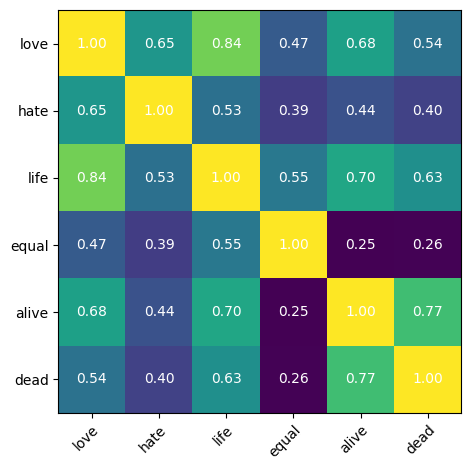

In [119]:
list_of_words = ['love', 'hate', 'life', 'equal', 'alive', 'dead']

similarity_matrix = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)

word_embeddings = []
for word in list_of_words:
    emb = glove50_model.embed_token(word)
    word_embeddings.append(emb)

# Calculate cosine similarity between pairs
for i in range(len(list_of_words)):
    for j in range(len(list_of_words)):
        similarity_matrix[i, j] = cosine_similarity(word_embeddings[i], word_embeddings[j])


plot_similarity_matrix(similarity_matrix, list_of_words)

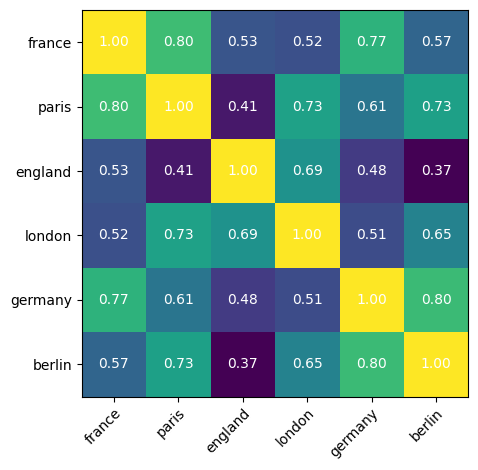

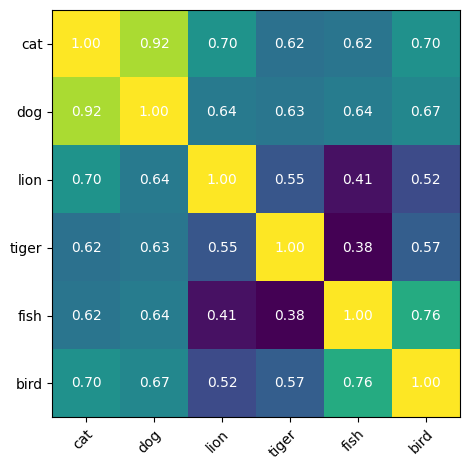

In [121]:

#  Countries and their capitals
list_of_words_1 = ['france', 'paris', 'england', 'london', 'germany', 'berlin']

similarity_matrix_1 = np.zeros((len(list_of_words_1), len(list_of_words_1)), dtype=float)

word_embeddings_1 = []
for word in list_of_words_1:
    emb = glove50_model.embed_token(word)
    word_embeddings_1.append(emb)

for i in range(len(list_of_words_1)):
    for j in range(len(list_of_words_1)):
        similarity_matrix_1[i, j] = cosine_similarity(word_embeddings_1[i], word_embeddings_1[j])

plot_similarity_matrix(similarity_matrix_1, list_of_words_1)


# Animals
list_of_words_2 = ['cat', 'dog', 'lion', 'tiger', 'fish', 'bird']

similarity_matrix_2 = np.zeros((len(list_of_words_2), len(list_of_words_2)), dtype=float)

word_embeddings_2 = []
for word in list_of_words_2:
    emb = glove50_model.embed_token(word)
    word_embeddings_2.append(emb)

for i in range(len(list_of_words_2)):
    for j in range(len(list_of_words_2)):
        similarity_matrix_2[i, j] = cosine_similarity(word_embeddings_2[i], word_embeddings_2[j])

plot_similarity_matrix(similarity_matrix_2, list_of_words_2)



- We plotted two sets or groups of terms, first was the Countries/Capitals set then the animals one. The results make a lot of sense, showing more similarity for terms that are closely coupled together and less for related terms. For example, domestic animals are more closely coupled together like dog and cat, additionally feline animals like cat and tiger are closely coupled, in contrast fish are less related to land animals than other land animals are. Other relations may exist such as fish and cats having a relatively high similarity may be because cats eat fish etc. On the countries and cities chart, we see capitals have a higher relation to their on respective countrries and a lower one to other countries. Additionally countries are more related to eachother than to the capitals of other countries.


### Back to Sentence Embeddings

Let us go back to embedding the whole sentences by averaging the embeddings in the sentence. Below you can find a code snippet that uses our `embed_text()` function and glove model.

In [123]:
query = 'fox and deer'
print(query)

query_embedding = embed_text(query, clean, tokenize, lambda x: glove50_model.embed_sentence(x, reduction='mean'))
print(query_embedding.shape)
print(query_embedding)

fox and deer
(50,)
[ 0.22032095  0.0235195   0.021275    0.30339     0.24796     0.262455
 -1.47255    -1.331385    0.390455   -0.53557    -0.245335    0.2052835
  0.459515    0.01924     0.261285    0.74634     0.7019      0.0687205
 -1.23738     0.464715   -0.566363   -0.30705     0.91077     0.4335
 -0.05902    -0.965785   -0.3145195   0.52024     0.288965   -0.85955
  1.238405    0.42643    -0.350285   -0.15881    -0.00256    -0.156965
 -0.3466795  -0.58526    -0.433885   -0.018855   -0.689623    0.736835
 -0.755175    0.17236     0.21935    -0.636005   -0.067895   -0.6279
  0.41433     0.50786   ]


<a name='e14'></a>
#### Exercise 14: Analyze sentence embeddings
- Calculate similarity between the word embeddings representations of the selected queries and the dataset sentences.
- Analyze the search results. Does the search work as expected? Discuss the results.
- Compare the results with the ones you got with the bag-of-words and TF-IDF representation. Discuss the differences and similarities.

In [1]:

print("Embedding validation answers with word embeddings")
answers_embeddings_glove = []
for example in tqdm.tqdm(answers_dataset['validation']):
    answer_tokens = example['answer_tokens']
    emb = glove50_model.embed_sentence(answer_tokens, reduction='mean')
    answers_embeddings_glove.append(emb)
answers_embeddings_glove = np.stack(answers_embeddings_glove, axis=0)

print("Answers embeddings shape:", answers_embeddings_glove.shape)

print('\n  Word Embeddings Results')
good_examples_glove = []
bad_examples_glove = []

for i, example in enumerate(dataset['validation']):
    if len(good_examples_glove) >= 3 and len(bad_examples_glove) >= 3:
        break

    query = example['query']
    correct_answer_id = example['answer_id']

    query_emb = embed_text(query, clean, tokenize, lambda x: glove50_model.embed_sentence(x, reduction='mean'))

    sims = cosine_similarity_1_to_n(query_emb, answers_embeddings_glove)
    top5 = top_k_indices(sims, k=5, sorted=True)

    if correct_answer_id in top5:
        if len(good_examples_glove) < 3:
            good_examples_glove.append({
                'idx': i,
                'query': query,
                'correct_answer_id': correct_answer_id,
                'top1_id': top5[0],
                'top1_score': sims[top5[0]],
                'top1_answer': answers_dataset['validation'][top5[0]]['answer']
            })
    else:
        if len(bad_examples_glove) < 3:
            bad_examples_glove.append({
                'idx': i,
                'query': query,
                'correct_answer_id': correct_answer_id,
                'top1_id': top5[0],
                'top1_score': sims[top5[0]],
                'top1_answer': answers_dataset['validation'][int(top5[0])]['answer']
            })

print('\nGOOD EXAMPLES (Word Embeddings)')
for ex in good_examples_glove:
    print(f"\nQuery: {ex['query']}")
    print(f"Correct answer ID: {ex['correct_answer_id']}")
    print(f"Top-1 ID: {ex['top1_id']} | Score: {ex['top1_score']:.4f}")
    print(f"Top-1 answer: {ex['top1_answer'][:180]}")

print('\nBAD EXAMPLES (Word Embeddings)')
for ex in bad_examples_glove:
    print(f"\nQuery: {ex['query']}")
    print(f"Correct answer ID: {ex['correct_answer_id']}")
    print(f"Top-1 ID: {ex['top1_id']} | Score: {ex['top1_score']:.4f}")
    print(f"Top-1 answer: {ex['top1_answer'][:180]}")


Embedding validation answers with word embeddings


NameError: name 'tqdm' is not defined

- Word embeddings seems to work quite well, it shows high performance with high similarity scores. Some failures show the limitation of just averaging.
- The search results show good results, for example in the case of the Jarlsberg Cheese query, it is able to capture the relation between cheese , originated, and Jarlsberg from the document about the Jarlsberg Cheese from Norway.Some worse results include the Evelyn Waugh novel query where the model understood it had to caputre resluts about novels and other similar words but failed to distinguish between authors.
- Advantages vs other methods
- word embeddings has the advantage of capturing some semantic meaning due to its nature of matching word similarities. It is also able to use synonyms like matching originated with documents talking about origins without specifically saying the word. A disadvantage vs tf-idf is that it does not weigh different terms more or less depending on the frequency or importance of the term.

## 6. Evaluating Retrieval

In this last section we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

Recall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e15'></a>
### Exercise 15: Cosine similarity between two sets of vectors

In this exercise you will revisit your implementation of the cosine similarity. Generalize it so that it can accept two arrays containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be an array of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [ ]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE




    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [ ]:
def calculate_recall(queries, sentences, labels, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)
                label = labels[query_index]
                if label in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

Here, we embed both the queries and answers from the validation subset.

In [ ]:
query_embeddings = []
expected_answers = []
for example in tqdm.tqdm(dataset['validation']):
    query_tokens = example['query_tokens']
    query_embeddings.append(glove50_model.embed_sentence(query_tokens, reduction='mean'))
    expected_answers.append(example['answer_id'])
query_embeddings = np.stack(query_embeddings, axis=0)
expected_answers = np.array(expected_answers)

answers_embeddings = []
for example in tqdm.tqdm(answers_dataset['validation']):
    answer_tokens = example['answer_tokens']
    answers_embeddings.append(glove50_model.embed_sentence(answer_tokens, reduction='mean'))
answers_embeddings = np.stack(answers_embeddings, axis=0)

You can use the recall function like so:

In [ ]:
recall_at_1 = calculate_recall(query_embeddings, answers_embeddings, expected_answers, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

<a name='e16'></a>
### Exercise 16: Evaluating retrieval methods

Calculate recall for different values of $K$ for all methods:
- BOW,
- TF-IDF,
- Pre-trained embeddings.
- Another pre-trained embeddings (for example with larger embedding vectors)

Make sure to test on the `test` split. Discuss the results. Comment on how recall changes based on the value of $K$. Are the results expected or surprising?

The deliverable for this whole lab is a scientific poster and this last question should be the main thing you will include in the poster.

In [ ]:
#### YOUR CODE HERE


### YOUR CODE ENDS HERE

--- YOUR ANSWERS HERE